In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ptfrwrd","key":"4a2f5a982ed53062345976efa42bd4c8"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! kaggle datasets list -s IMDb

ref                                                       title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ashirwadsangwan/imdb-dataset                              IMDb Dataset                                          1GB  2019-11-18 18:36:47           3004  
orgesleka/imdbmovies                                      IMDB Movies Dataset                                 783KB  2016-11-15 14:32:10          14960  
stefanoleone992/imdb-extensive-dataset                    IMDb movies extensive dataset                        64MB  2019-11-24 20:59:17           3688  
PromptCloudHQ/imdb-data                                   IMDB data from 2006 to 2016                         134KB  2017-06-26 07:32:04          18284  
utathya/imdb-review-dataset                               IMDB Review Datase

In [5]:
! kaggle datasets download -d  stefanoleone992/imdb-extensive-dataset  

 83% 53.0M/64.2M [00:01<00:00, 29.9MB/s]
100% 64.2M/64.2M [00:01<00:00, 53.1MB/s]


In [6]:
! mkdir data
! unzip imdb-extensive-dataset.zip -d data

mkdir: cannot create directory ‘data’: File exists
Archive:  imdb-extensive-dataset.zip
  inflating: data/IMDb movies.csv    
  inflating: data/IMDb names.csv     
  inflating: data/IMDb ratings.csv   
  inflating: data/IMDb title_principals.csv  


# Let`s see the data:

- do EDA;
- find anomalies;
- some statistic.

In [8]:
imdb_ratings = pd.read_csv('data/IMDb ratings.csv', usecols=['weighted_average_vote', 'imdb_title_id'])
imdb_movies = pd.read_csv('data/IMDb movies.csv', usecols = ['title', 'year', 'genre', 'duration', 'country', 'imdb_title_id', 'director', 'language'])
ratings = pd.merge(imdb_movies,imdb_ratings, on='imdb_title_id', how='inner')
ratings

,imdb_title_id,title,year,genre,duration,country,language,director,weighted_average_vote
0,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,6.1
1,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.9
2,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2
3,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,5.7
...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,2019,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,7.2
81269,tt9905412,Ottam,2019,Drama,120,India,Malayalam,Zam,7.8
81270,tt9905462,Pengalila,2019,Drama,111,India,Malayalam,T.V. Chandran,8.4
81271,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,8.4


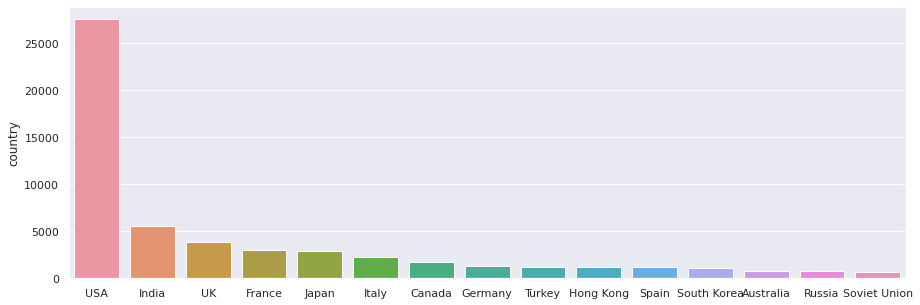

In [9]:
country_count=ratings['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:15]
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = topcountries.index, y = 'country' , data = topcountries)

In [10]:
counties_ratings = {'USA': ratings['weighted_average_vote'].loc[ratings['country'] == 'USA'].mean() , 
                    'India': ratings['weighted_average_vote'].loc[ratings['country'] == 'India'].mean(), 
                    'UK': ratings['weighted_average_vote'].loc[ratings['country'] == 'UK'].mean(), 
                    'France': ratings['weighted_average_vote'].loc[ratings['country'] == 'France'].mean(), 
                    'Japan': ratings['weighted_average_vote'].loc[ratings['country'] == 'Japan'].mean(), 
                    'Italy': ratings['weighted_average_vote'].loc[ratings['country'] == 'Italy'].mean(), 
                    'Canada': ratings['weighted_average_vote'].loc[ratings['country'] == 'Canada'].mean(), 
                    'Germany': ratings['weighted_average_vote'].loc[ratings['country'] == 'Germany'].mean(), 
                    'Turkey': ratings['weighted_average_vote'].loc[ratings['country'] == 'Turkey'].mean(), 
                    'Hong Kong': ratings['weighted_average_vote'].loc[ratings['country'] == 'Hong Kong'].mean(), 
                    'Spain': ratings['weighted_average_vote'].loc[ratings['country'] == 'Spain'].mean(), 
                    'South Korea': ratings['weighted_average_vote'].loc[ratings['country'] == 'South Korea'].mean(), 
                    'Australia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Australia'].mean(), 
                    'Russia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Russia'].mean(),
                    'Soviet Union': ratings['weighted_average_vote'].loc[ratings['country'] == 'Soviet Union'].mean()}

counties_ratings = pd.DataFrame.from_dict(counties_ratings, orient='index')
counties_ratings = counties_ratings.rename(columns={0: 'rating'})
counties_ratings = counties_ratings.sort_values(by=['rating'])
counties_ratings

,rating
Canada,5.417750
USA,5.588720
Russia,5.703867
Australia,5.708568
UK,5.820625
Spain,5.821273
Italy,5.861350
Turkey,5.876582
Germany,5.941238
Hong Kong,6.110983


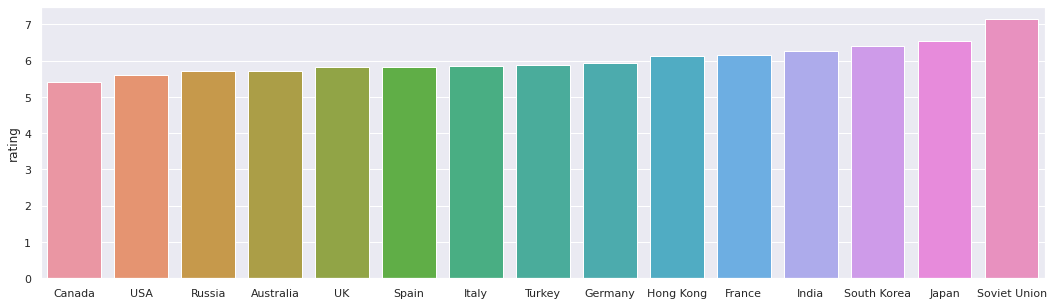

In [11]:
plt.figure(figsize=(18,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = counties_ratings.index, y = 'rating', data = counties_ratings)

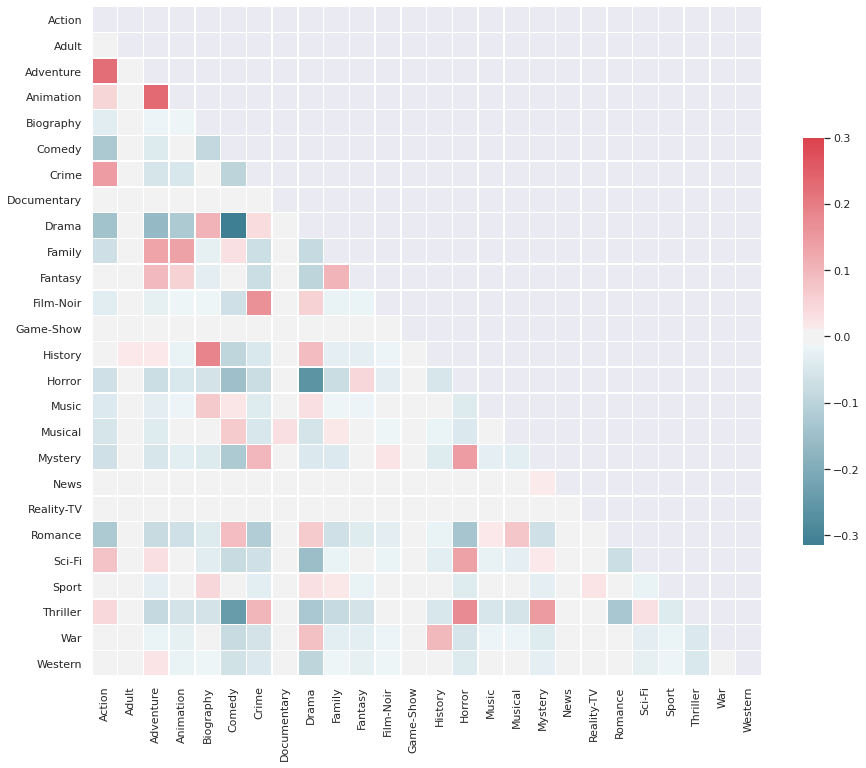

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer

genre_data = ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
test = genre_data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

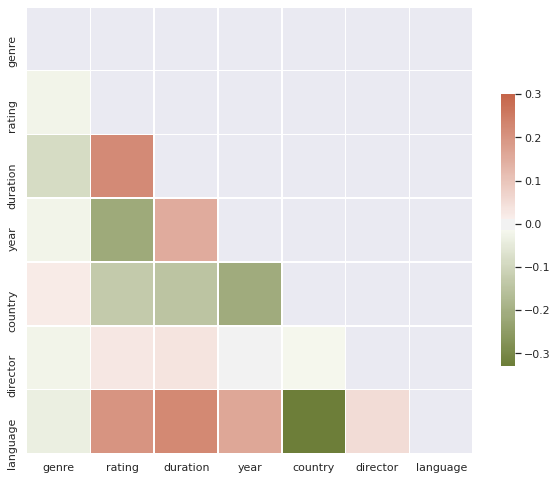

,genre,rating,duration,year,country,director,language
genre,1.000000,-0.021763,-0.086350,-0.021424,0.021050,-0.020793,-0.038733
rating,-0.021763,1.000000,0.221752,-0.213843,-0.127784,0.029102,0.201514
duration,-0.086350,0.221752,1.000000,0.150164,-0.144714,0.038391,0.224677
year,-0.021424,-0.213843,0.150164,1.000000,-0.210027,0.008848,0.162640
country,0.021050,-0.127784,-0.144714,-0.210027,1.000000,-0.012620,-0.329223
director,-0.020793,0.029102,0.038391,0.008848,-0.012620,1.000000,0.051870
language,-0.038733,0.201514,0.224677,0.162640,-0.329223,0.051870,1.000000


In [13]:
genre_ratings = {
    'genre': ratings.genre,
    'rating': ratings.weighted_average_vote,
    'duration': ratings.duration,
    'year': ratings.year,
    'country': ratings.country,
    'director': ratings.director,
    'language': ratings.language
}
genre_ratings = pd.DataFrame.from_dict(genre_ratings)
#genre_ratings['genre'] = genre_ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
genre_ratings['genre'] = genre_ratings['genre'].astype('category').cat.codes
genre_ratings['country'] = genre_ratings['country'].astype('category').cat.codes
genre_ratings['director'] = genre_ratings['director'].astype('category').cat.codes
genre_ratings['language'] = genre_ratings['language'].astype('category').cat.codes
corr = genre_ratings.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(100, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

In [17]:
! kaggle datasets download -d  jrobischon/wikipedia-movie-plots 

 30% 9.00M/29.9M [00:00<00:01, 12.9MB/s]
100% 29.9M/29.9M [00:01<00:00, 30.7MB/s]


In [20]:
! unzip  wikipedia-movie-plots.zip -d data

Archive:  wikipedia-movie-plots.zip
  inflating: data/wiki_movie_plots_deduped.csv  


# Let`s download the new dataset and merge all datasets:

- also do some EDA;
- detection anomalies;
- do some statistics.

In [24]:
movies_plots_data = pd.read_csv('data/wiki_movie_plots_deduped.csv', usecols=['Release Year','Title','Plot'])
movies_plots_data.drop_duplicates(inplace=True)
movies_plots_data = movies_plots_data.rename(columns={'Title': 'title', 'Release Year': 'release year', 'Plot': 'plot'})
ratings = ratings.rename(columns={'year': 'release year'})
ratings.drop_duplicates(inplace=True)
merge_data = movies_plots_data.merge(ratings, how="inner", on=['title','release year'])
merge_data

,release year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7
...,...,...,...,...,...,...,...,...,...,...
19084,2013,Selam,The film opens with a Senegalese boy named Kha...,tt2737018,"Drama, Romance",104,Turkey,Turkish,Levent Demirkale,6.7
19085,2014,Sivas,The film follows an eleven-year-old boy named ...,tt3894344,Drama,97,"Germany, Turkey",Turkish,Kaan Müjdeci,7.5
19086,2014,The Water Diviner,"The film begins in 1919, just after World War ...",tt3007512,"Drama, History, War",111,"Australia, USA","English, Turkish, Greek, Russian",Russell Crowe,7.0
19087,2017,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",tt6313158,Comedy,108,Turkey,Turkish,Hakan Algül,6.3


In [26]:
merge_data.columns

Index(['release year', 'title', 'plot', 'imdb_title_id', 'genre', 'duration',
       'country', 'language', 'director', 'weighted_average_vote'],
      dtype='object')

**See count of movies at 15-years period (from 1996 to 2017)**

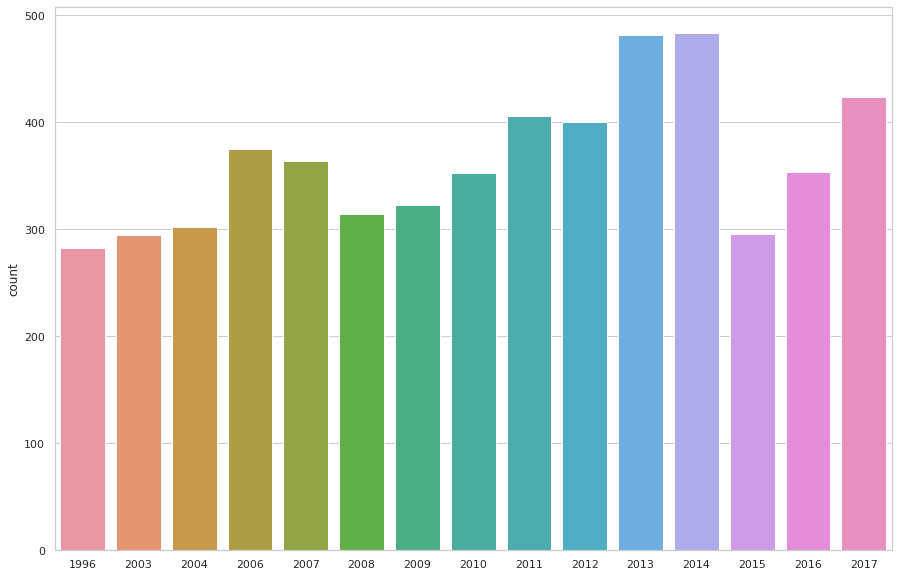

In [25]:
movies_count = merge_data['release year'].value_counts().sort_values(ascending=False)
movies_count = pd.DataFrame(movies_count).rename(columns={'release year': 'count'})
movies_for_plot = movies_count[0:15]
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.barplot(x=movies_for_plot.index, y="count", data=movies_for_plot)

**See top movie directors:**

[Text(0, 0, 'Michael Curtiz'),
 Text(0, 0, 'Lloyd Bacon'),
 Text(0, 0, 'Alfred Hitchcock'),
 Text(0, 0, 'Norman Taurog'),
 Text(0, 0, 'Gordon Douglas'),
 Text(0, 0, 'John Ford'),
 Text(0, 0, 'Mervyn LeRoy'),
 Text(0, 0, 'Richard Thorpe'),
 Text(0, 0, 'Raoul Walsh'),
 Text(0, 0, 'Henry Hathaway'),
 Text(0, 0, 'William A. Wellman'),
 Text(0, 0, 'George Marshall'),
 Text(0, 0, 'Woody Allen'),
 Text(0, 0, 'Alfred E. Green'),
 Text(0, 0, 'J. Lee Thompson'),
 Text(0, 0, 'William A. Seiter'),
 Text(0, 0, 'Allan Dwan'),
 Text(0, 0, 'Roy Del Ruth'),
 Text(0, 0, 'George Cukor'),
 Text(0, 0, 'Ray Enright')]

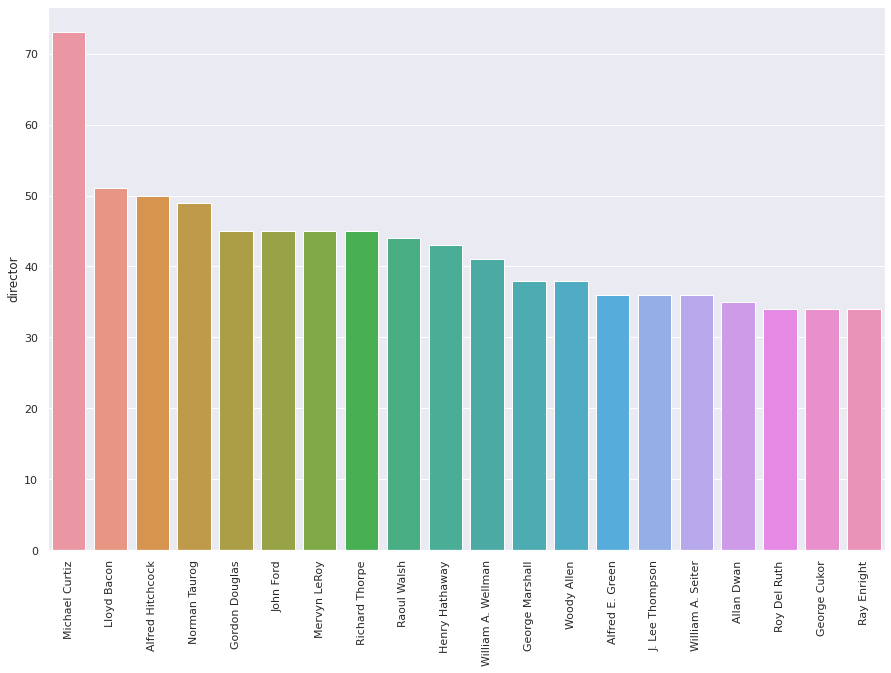

In [34]:
director_count = merge_data['director'].value_counts().sort_values(ascending=False)
director_count = pd.DataFrame(director_count)
top_directors = director_count[0:20]
plt.figure(figsize=(15,10))
ax = sns.barplot(x = top_directors.index, y = 'director' , data = top_directors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**See wordcloud of plots:**

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

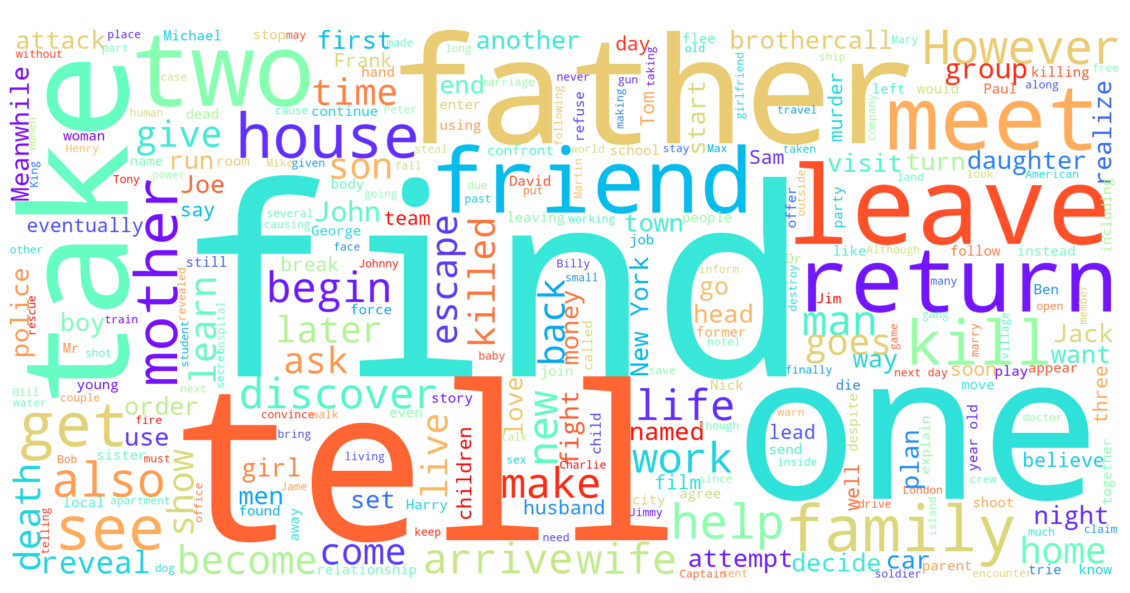

In [37]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords

words_cloud = merge_data['plot'].str.split("(").str[0].value_counts().keys()
eng_stopwords = stopwords.words("english")
wc1 = WordCloud(stopwords=eng_stopwords,scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(words_cloud))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Job Descriptions",color='white',fontsize=20)
plt.show()

**See ratings for top-20 genre:**

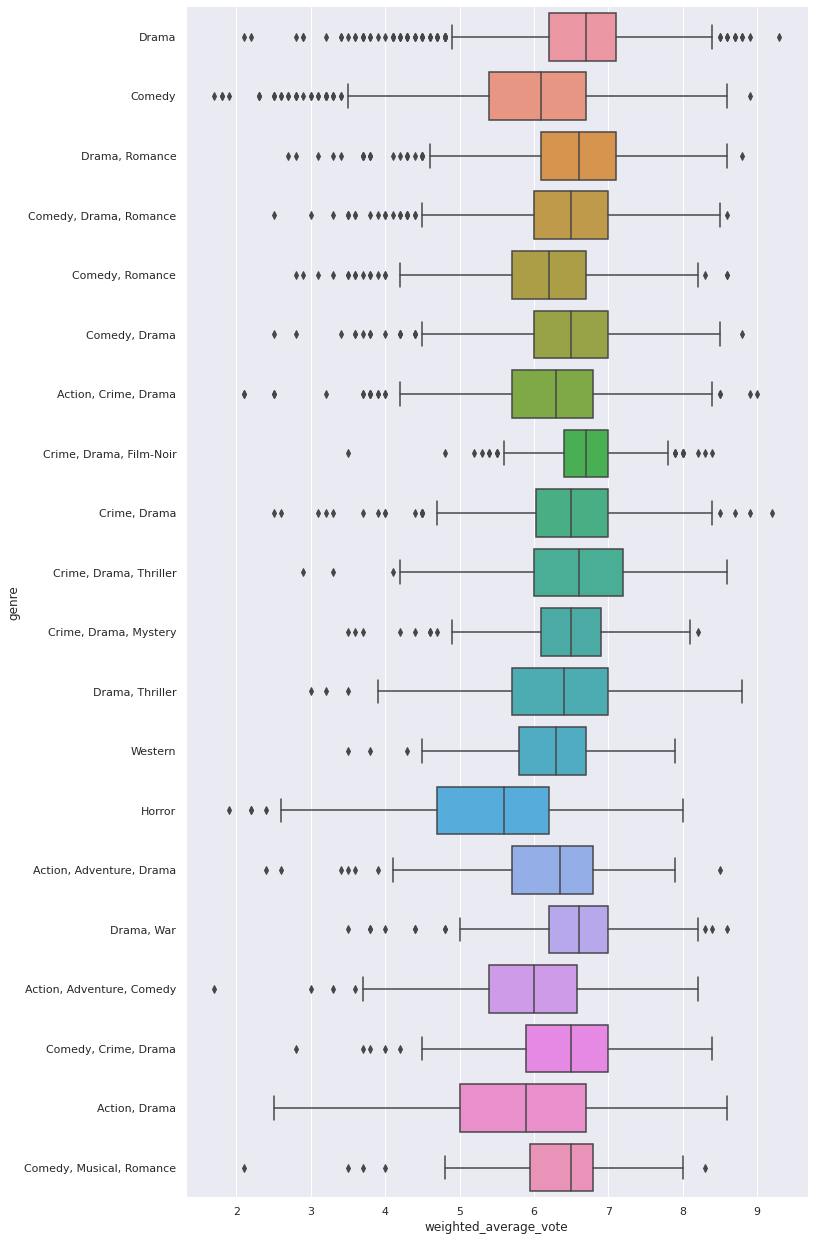

In [46]:
gr = sns.catplot(x = 'weighted_average_vote', y = 'genre', kind = "box", data = merge_data, order = merge_data.genre.value_counts().iloc[:20].index)
gr.fig.set_size_inches(20, 20)

**See ratings for top-20 directors:**

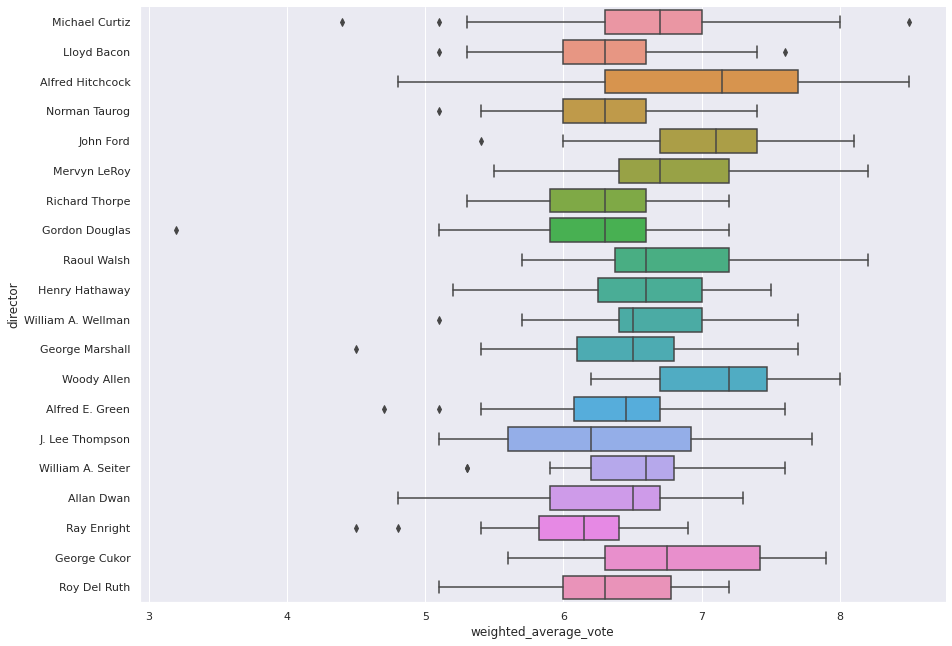

In [47]:
gr = sns.catplot(x = 'weighted_average_vote', y = 'director', kind = "box", data = merge_data, order = merge_data.director.value_counts().iloc[:20].index)
gr.fig.set_size_inches(20, 10)

**See ratings for the top 20 years of movies counts:**


In [49]:
merge_data = merge_data.rename(columns={'release year': 'year'})

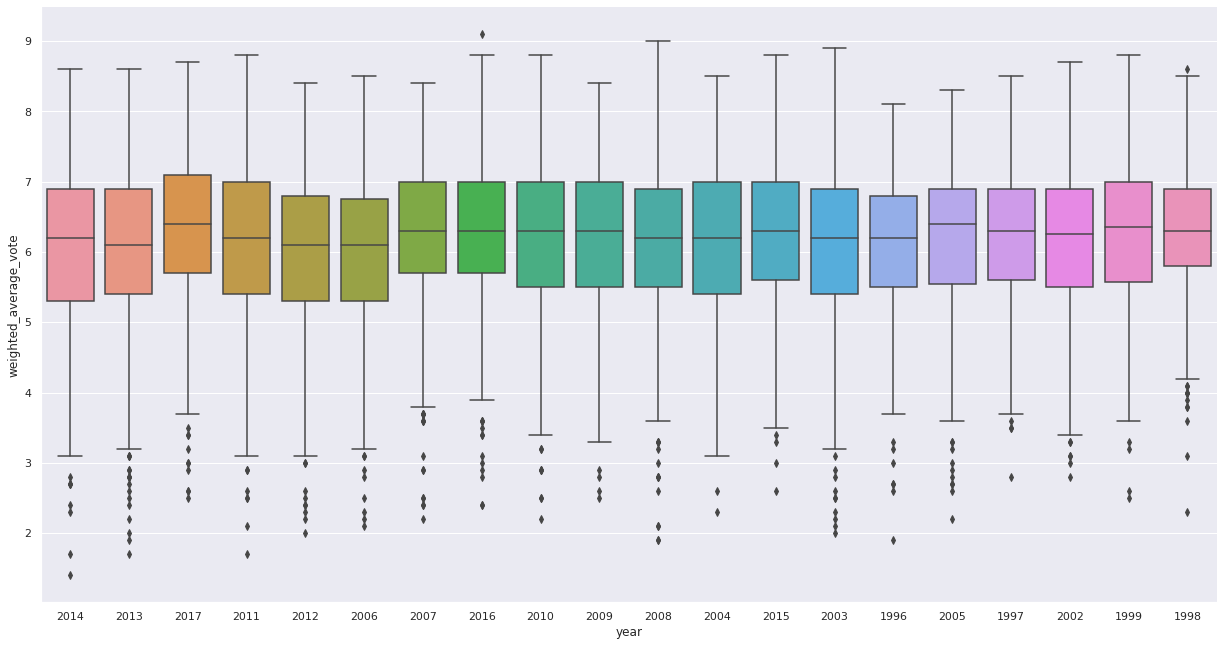

In [68]:
gr = sns.catplot(x = 'year', y = 'weighted_average_vote', kind = "box", data = merge_data, order=merge_data.year.value_counts().iloc[0:20].index)
gr.fig.set_size_inches(20, 10)

**See lenght of plots distribution:**

In [69]:
merge_data['length'] = merge_data['plot'].str.len()
merge_data.head()

,year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote,length
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7,3001
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1,2974
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9,637
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2,3039
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7,350


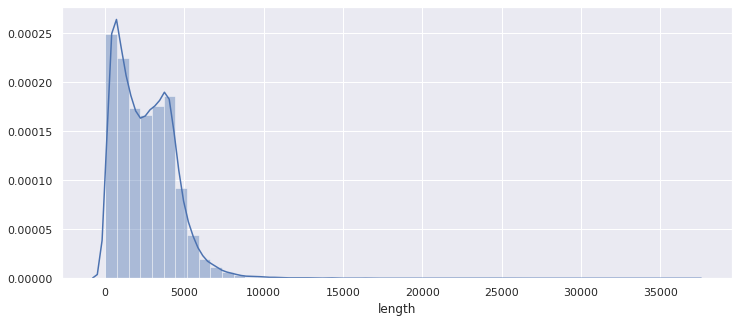

In [72]:
plt.figure(figsize=(12,5))
g = sns.distplot(merge_data['length'])
plt.show()

# Create topic model (LDA) for plots:

- pre-proccessing the data;
- create test LDA-model;
- analyse influence of alpa, eta hyperparametrs and number of topics for increase quality;
- based on LDA-model create topics for each movie.

In [73]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
import gensim, spacy
import re

In [76]:
def clean_data(text):
    def sentences_to_words(sentences):
        # delete new lines
            sentences = re.sub('\s+', ' ', sentences)
        # delete ", '
            sentences = re.sub("\'", "", sentences)
        # tokens without . ,
            sentences = gensim.utils.simple_preprocess(sentences, deacc=True)
            yield (sentences)
    clear_data = list(sentences_to_words(text))
    return (clear_data)

merge_data['topics'] = [clean_data(plot) for plot in merge_data['plot']]
merge_data.head()

,year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote,length,topics
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7,3001,"[[dr, friedrich, von, kammacher, olaf, fønss, ..."
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1,2974,"[[cinderella, is, kind, young, woman, who, liv..."
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9,637,"[[in, the, film, lillian, travers, wealthy, no..."
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2,3039,"[[king, krewl, raymond, russell, is, cruel, di..."
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7,350,"[[john, howard, payne, leaves, home, and, begi..."


In [86]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

def make_bigrams(texts):
    bigram = Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = Phraser(bigram)
    trigram = Phrases(bigram[texts], threshold=100)
    trigram_mod = Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [78]:
! python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [87]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# final processing, includes lemmatization and stop-words
def process_words(text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'scene', ' film'])
    text_without_stop_words = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in text]
    texts_bigrams = make_bigrams(text_without_stop_words)
    data_lemmatized = []
    for sent in texts_bigrams:
        doc = nlp(" ".join(sent))
        data_lemmatized.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    data_lemmatized = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_lemmatized]
    return data_lemmatized